In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_handling
import functions
import mne
import scipy.signal as signal

In [2]:
eeg_data, eeg_data_stimulus_only, trial_length = dataset_handling.load_ssvep_data(18)
sampling_rate = 250

data_frequencies, electrodes_names = dataset_handling.load_ssvep_additional_info()
occipital_electrodes, occipital_electrodes_indexes, occipital_electrodes_names = dataset_handling.select_occipital_electrodes(electrodes_names)

samples_without_stimulus = int(0.5 * sampling_rate)

t_stimulus_only = np.arange(0, len(eeg_data_stimulus_only[0])/sampling_rate, 1/sampling_rate)
t = np.arange(0, len(eeg_data[0])/sampling_rate, 1/sampling_rate)

num_electrodes = len(eeg_data)

Text(0, 0.5, 'Amplitude')

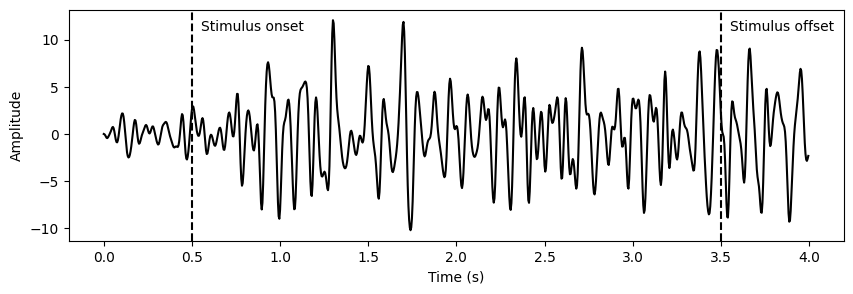

In [3]:
# Average 10.6 Hz

average_data = np.mean(eeg_data[occipital_electrodes_indexes, :, 2, 10], axis=0)

low_freq = 5
high_freq = 25
sampling_rate = 250

b, a = signal.butter(4, [low_freq, high_freq], fs=sampling_rate, btype='band')

filtered_data = signal.lfilter(b, a, average_data)

plt.figure(figsize=(10, 3))
plt.plot(t, filtered_data, "k")
plt.axvline(0.5,linestyle="dashed", color="k")
plt.text(0.55, 11, "Stimulus onset")
plt.axvline(3.5,linestyle="dashed", color="k")
plt.text(3.55, 11, "Stimulus offset")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

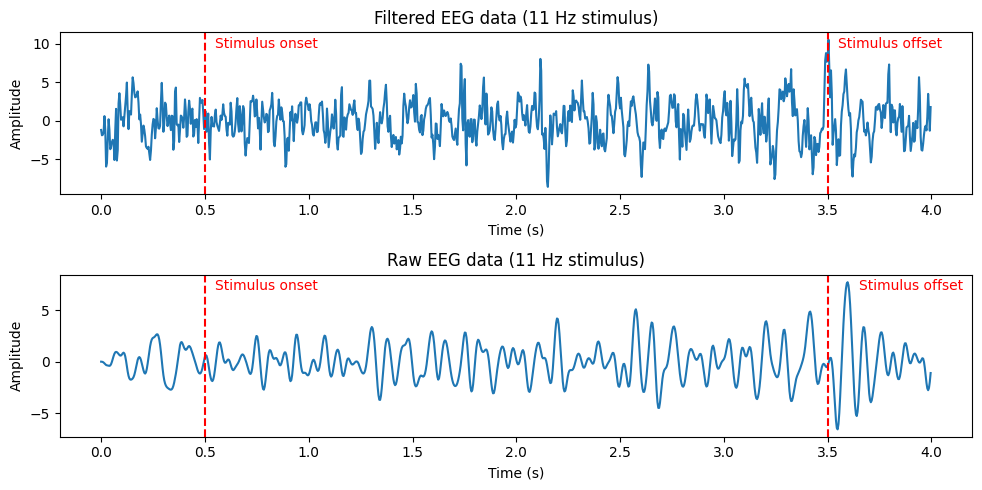

Maximum peak corresponding to frequency  11.0  Hz
Maximum peak corresponding to frequency  11.0  Hz


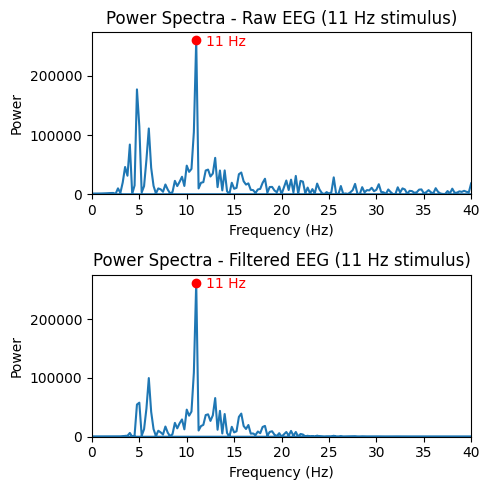

In [60]:
# OZ - POZ 11 Hz

data = eeg_data[61, :, 0, 12] - eeg_data[55, :, 0, 12]

low_freq = 5
high_freq = 20
sampling_rate = 250

b, a = signal.butter(4, [low_freq, high_freq], fs=sampling_rate, btype='band')

filtered_data = signal.lfilter(b, a, data)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

axs[0].plot(t, data)
axs[0].set_title('Filtered EEG data (11 Hz stimulus)')
axs[0].axvline(0.5,linestyle="dashed", color="red")
axs[0].text(0.55, 9.5, "Stimulus onset", color="red")
axs[0].axvline(3.5,linestyle="dashed", color="red")
axs[0].text(3.55, 9.5, "Stimulus offset", color="red")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(t, filtered_data)
axs[1].set_title('Raw EEG data (11 Hz stimulus)')
axs[1].axvline(0.5,linestyle="dashed", color="red")
axs[1].text(0.55, 7, "Stimulus onset", color="red")
axs[1].axvline(3.5,linestyle="dashed", color="red")
axs[1].text(3.65, 7, "Stimulus offset", color="red")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")

# Add space between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

fft_result = np.fft.fft(data)
freq = np.fft.fftfreq(len(data), d=1/sampling_rate)
power_spectra = np.abs(fft_result) ** 2

print("Maximum peak corresponding to frequency ", freq[np.argmax(power_spectra)], " Hz")


axs[0].plot(freq, power_spectra)
axs[0].set_title("Power Spectra - Raw EEG (11 Hz stimulus)")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Power")
axs[0].plot(freq[np.argmax(power_spectra)], max(power_spectra[0:500]), marker="o", color="red")
axs[0].text(freq[np.argmax(power_spectra)] + 1, max(power_spectra[0:500]) - 10000, "11 Hz", color="red")
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0)

fft_result = np.fft.fft(filtered_data)
freq = np.fft.fftfreq(len(data), d=1/sampling_rate)
power_spectra = np.abs(fft_result) ** 2

print("Maximum peak corresponding to frequency ", freq[np.argmax(power_spectra)], " Hz")


axs[1].plot(freq, power_spectra)
axs[1].set_title("Power Spectra - Filtered EEG (11 Hz stimulus)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Power")
axs[1].plot(freq[np.argmax(power_spectra)], max(power_spectra[0:500]), marker="o", color="red")
axs[1].text(freq[np.argmax(power_spectra)] + 1, max(power_spectra[0:500]) - 10000, "11 Hz", color="red")
axs[1].set_xlim(0, 40)
axs[1].set_ylim(0)

# Add space between subplots
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Amplitude')

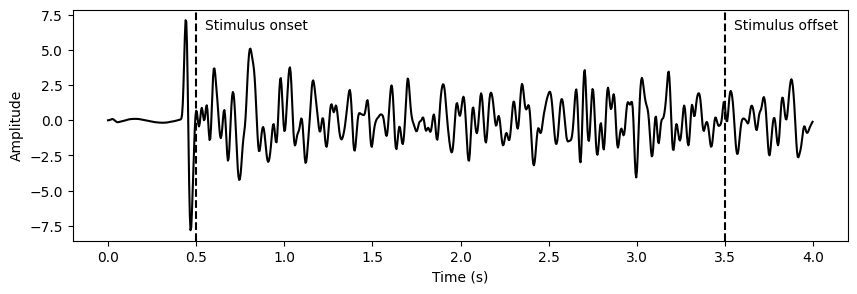

In [4]:
# OZ - POZ
data = eeg_data[61, :, 2, 10] - eeg_data[55, :, 2, 10]

low_freq = 5
high_freq = 25
sampling_rate = 250

b, a = signal.butter(4, [low_freq, high_freq], fs=sampling_rate, btype='band')

filtered_data = signal.lfilter(b, a, data)

plt.figure(figsize=(10, 3))
plt.plot(t, filtered_data, "k")
plt.axvline(0.5,linestyle="dashed", color="k")
plt.text(0.55, 6.5, "Stimulus onset")
plt.axvline(3.5,linestyle="dashed", color="k")
plt.text(3.55, 6.5, "Stimulus offset")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [101]:
s = ""
for f in data_frequencies:
    s += str(round(f, 2)) + ", "

print(s)

8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8, 11.0, 11.2, 11.4, 11.6, 11.8, 12.0, 12.2, 12.4, 12.6, 12.8, 13.0, 13.2, 13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14.8, 15.0, 15.2, 15.4, 15.6, 15.8, 8.0, 8.2, 8.4, 


In [103]:
print(occipital_electrodes_names)

['PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'O1', 'OZ', 'O2']


(0.0, 4.0)

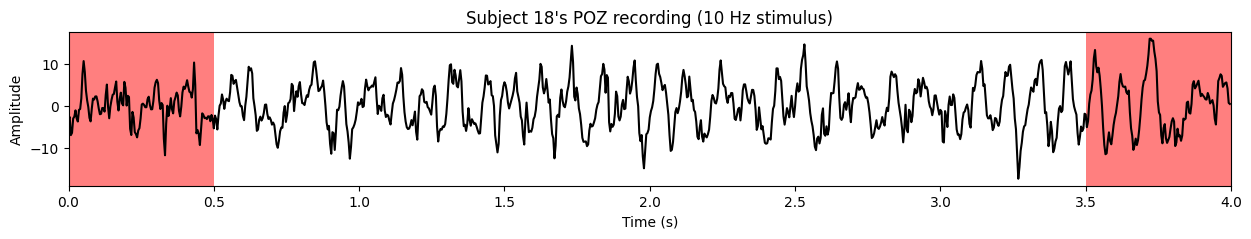

In [97]:
plt.figure(figsize=(15, 2))
plt.plot(t, eeg_data[55, :, 0, 7], 'k')
plt.title("Subject 18's POZ recording (10 Hz stimulus)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.axvspan(0, 0.5, facecolor='red', alpha=0.5)
plt.axvspan(3.5, 4.0, facecolor='red', alpha=0.5)
plt.xlim(0, 4)

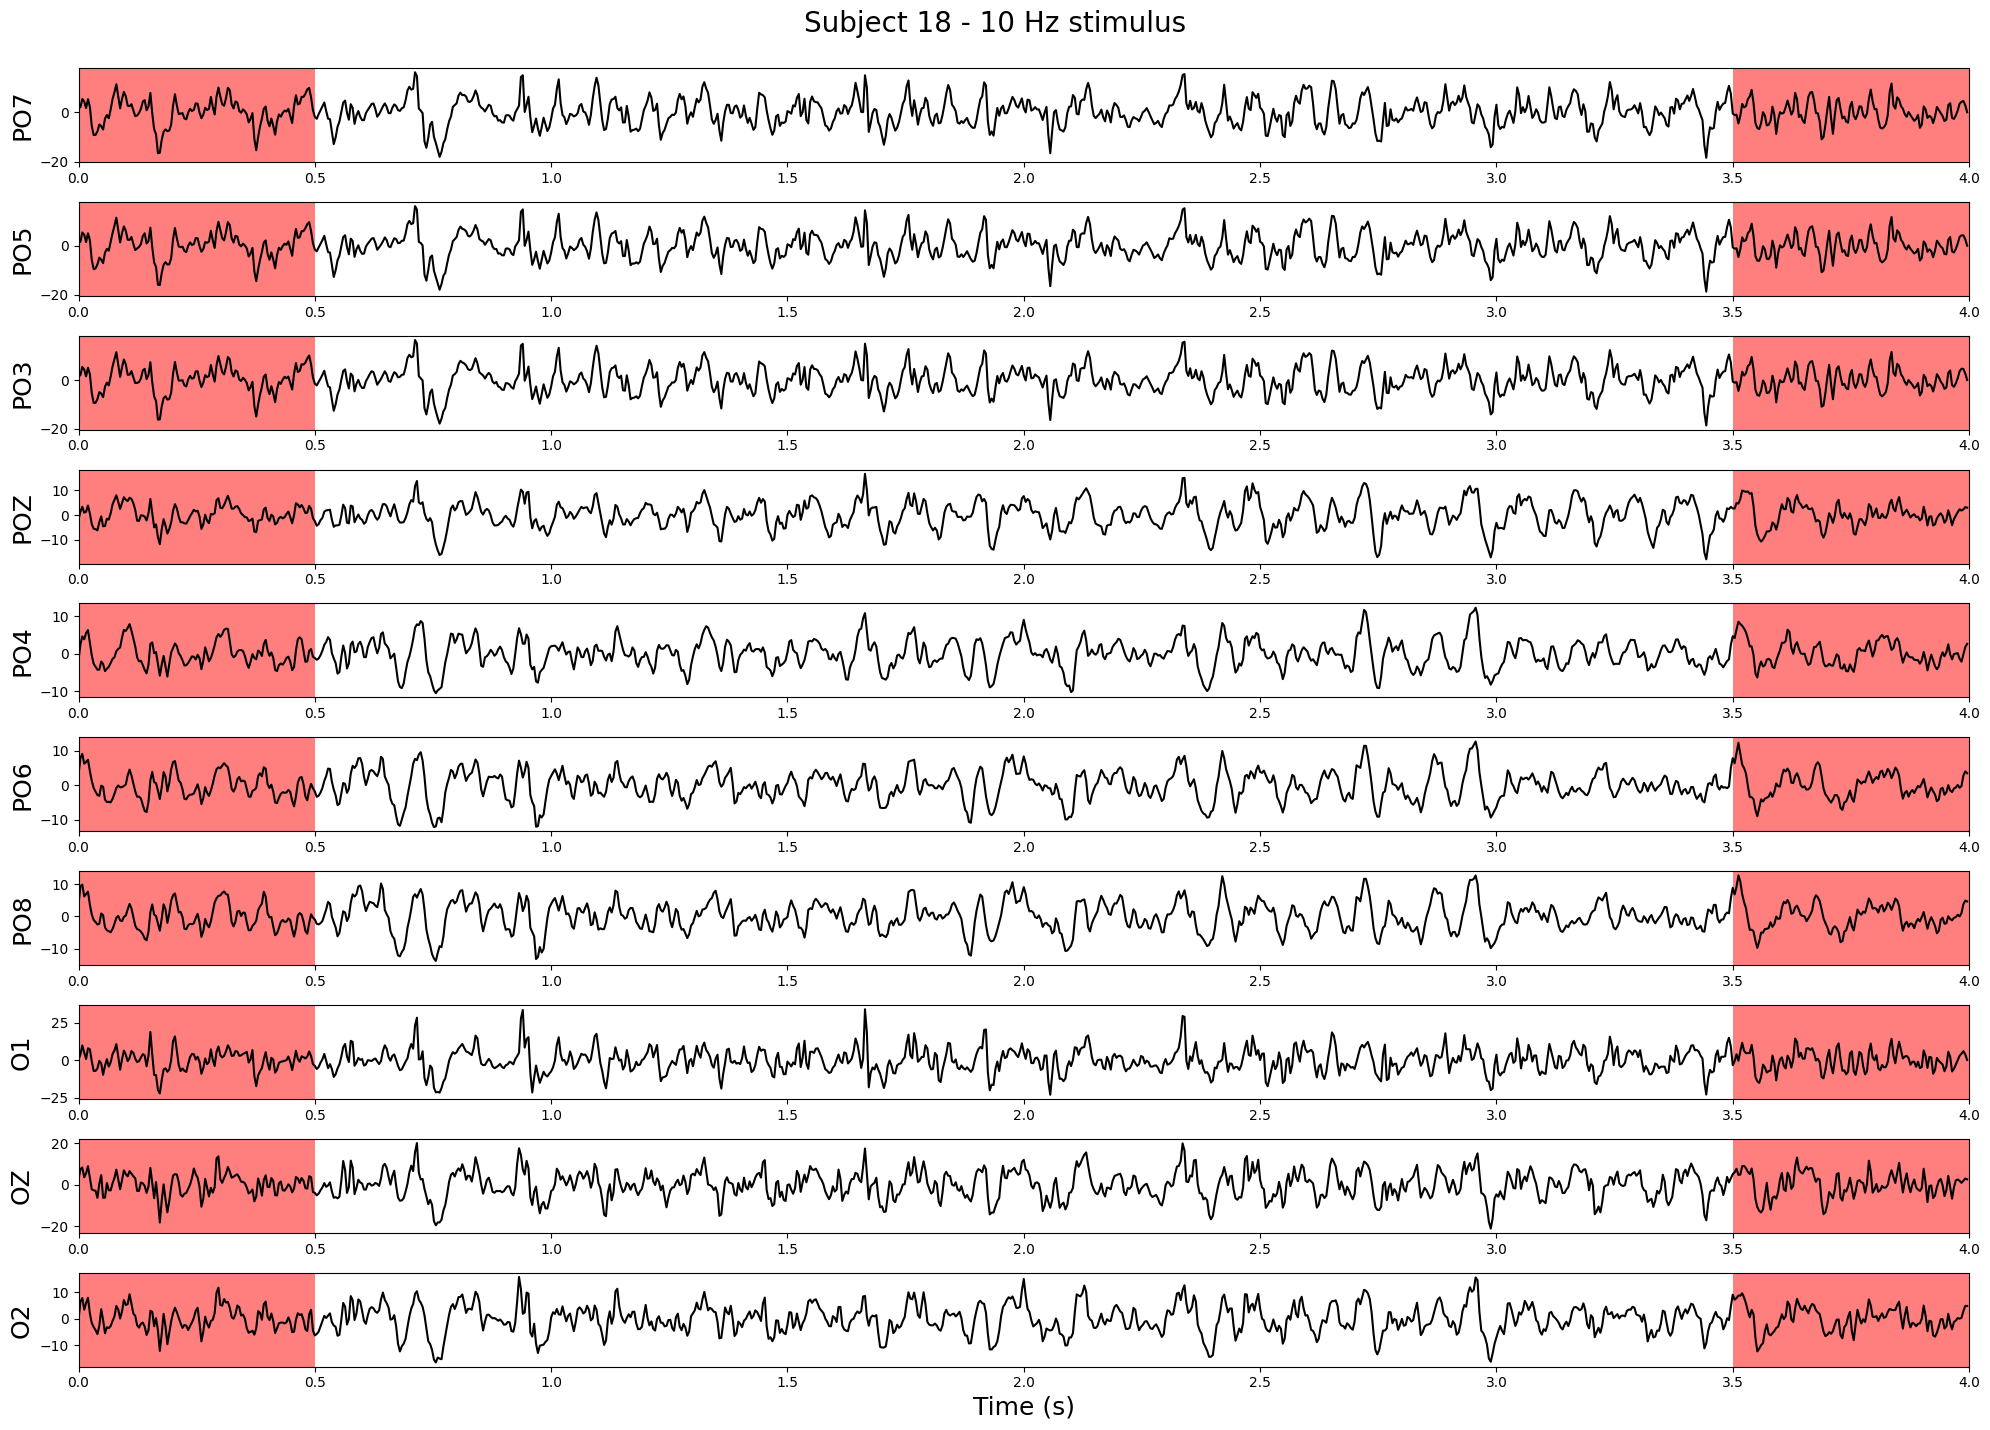

In [91]:
fig, axes = plt.subplots(len(occipital_electrodes_indexes), 1, figsize=(20, 1.5*len(occipital_electrodes_indexes)))

for idx, electrode in enumerate(occipital_electrodes):
    ax = axes[idx]
    data = eeg_data[electrode[0], :, 0, 0]
    ax.plot(t, data, 'k')
    ax.set_ylabel(electrode[1], fontsize=18)
    ax.axvspan(0, 0.5, facecolor='red', alpha=0.5)
    ax.axvspan(3.5, 4.0, facecolor='red', alpha=0.5)
    ax.set_xlim(0, 4)

# Set common x-axis label
axes[-1].set_xlabel('Time (s)', fontsize=18)

# Set a common title for all subplots
fig.suptitle("Subject 18 - 10 Hz stimulus", fontsize=20)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Show the plot
plt.show()
